In [2]:
import os
import random
import pickle

import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf

## Loading Dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving kagglecatsanddogs_5340.zip to kagglecatsanddogs_5340 (1).zip


In [8]:
!unzip -q /content/kagglecatsanddogs.zip 

In [3]:
path_to_image = "/content/PetImages/Cat/14.jpg"

In [4]:
image = cv2.imread(path_to_image, cv2.IMREAD_COLOR)

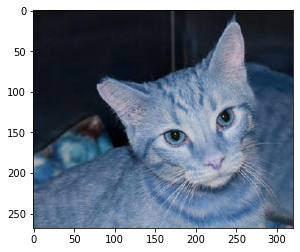

In [5]:
plt.imshow(image)
plt.show()

In [6]:
type(image)

numpy.ndarray

In [7]:
image

array([[[ 17,  18,  22],
        [ 16,  17,  21],
        [ 16,  17,  21],
        ...,
        [ 22,  23,  27],
        [ 22,  23,  27],
        [ 22,  23,  27]],

       [[ 17,  18,  22],
        [ 16,  17,  21],
        [ 16,  17,  21],
        ...,
        [ 22,  23,  27],
        [ 22,  23,  27],
        [ 22,  23,  27]],

       [[ 17,  18,  22],
        [ 16,  17,  21],
        [ 16,  17,  21],
        ...,
        [ 23,  24,  28],
        [ 22,  23,  27],
        [ 22,  23,  27]],

       ...,

       [[ 66, 100, 130],
        [ 71, 102, 133],
        [ 70, 101, 132],
        ...,
        [ 86,  88,  99],
        [ 75,  79,  90],
        [ 65,  68,  82]],

       [[ 67, 101, 131],
        [ 72, 103, 134],
        [ 72, 103, 134],
        ...,
        [119, 115, 126],
        [104, 102, 114],
        [ 91,  88, 103]],

       [[ 74, 108, 138],
        [ 78, 109, 140],
        [ 77, 108, 139],
        ...,
        [137, 129, 139],
        [121, 115, 126],
        [108, 101, 114]]

In [8]:
image.shape

(268, 320, 3)

## Image Preprocessing



In [9]:
import glob

In [10]:
def normalize(x):
  x = (x-x.min())/(x.max()-x.min())
  return x

In [28]:
path = "/content/PetImages/*"
images_labels = []
error_images = []
labels = []

error = 0
number = 0


for animal_path in glob.glob(path):
    img_per_category = 0
    label = animal_path.split("/")[-1]
    labels.append(label)
    idx = labels.index(label)
    for image_path in glob.glob(os.path.join(animal_path, "*.jpg")):

      if img_per_category == 1000 and (label == "Cat" or label == "Dog"):
        break
      path_to_image = f"{image_path}"

      try:

        img = cv2.imread(path_to_image, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (128,128))
        img = normalize(img)
        images_labels.append([img, idx])
        img_per_category += 1

      except Exception as e:

        error += 1
        error_images.append(image_path)

      finally:

        number += 1

      print(f"\rProcessed: {number} | Errors: {error}", end="")
      

    

Processed: 2003 | Errors: 3

In [29]:
error_images

['/content/PetImages/Cat/936.jpg',
 '/content/PetImages/Cat/10404.jpg',
 '/content/PetImages/Cat/9565.jpg']

In [30]:
images_labels

[[array([[[0.16078431, 0.11372549, 0.09411765],
          [0.38823529, 0.36862745, 0.30980392],
          [0.40784314, 0.41176471, 0.34509804],
          ...,
          [0.24705882, 0.21176471, 0.2       ],
          [0.21960784, 0.18431373, 0.17254902],
          [0.22352941, 0.18823529, 0.17647059]],
  
         [[0.2       , 0.09411765, 0.10588235],
          [0.39215686, 0.35686275, 0.31764706],
          [0.3372549 , 0.36862745, 0.31372549],
          ...,
          [0.24313725, 0.20784314, 0.19607843],
          [0.23137255, 0.19607843, 0.18431373],
          [0.23137255, 0.19607843, 0.18431373]],
  
         [[0.20392157, 0.09411765, 0.12156863],
          [0.47843137, 0.43529412, 0.40784314],
          [0.34117647, 0.36470588, 0.31764706],
          ...,
          [0.23529412, 0.2       , 0.18823529],
          [0.23137255, 0.19607843, 0.18431373],
          [0.22745098, 0.19215686, 0.18039216]],
  
         ...,
  
         [[0.97254902, 0.9372549 , 0.89803922],
          [0.9

In [31]:
with open("images_list.pickle", "wb") as f:
  pickle.dump(images_labels, f)

In [32]:
images_labels[0][0].shape

(128, 128, 3)

In [33]:
print(np.array(images_labels)[:,1])

[0 0 0 ... 1 1 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [34]:
for _ in range(10):
  random.shuffle(images_labels)

In [35]:
np.array(images_labels)[:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


array([1, 1, 0, ..., 0, 0, 1], dtype=object)

In [36]:
X = []
y = []

for image, idx in images_labels:
  X.append(image)
  y.append(idx)

In [37]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

In [38]:
X_train = X[:1600]
y_train = y[:1600]

X_val = X[1600:1800]
y_val = y[1600:1800]

X_test = X[1800:]
y_test = y[1800:]

In [39]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [40]:
print(len(X_train))
print(len(y_train))

print(len(X_val))
print(len(y_val))

print(len(X_test))
print(len(y_test))

1600
1600
200
200
200
200


In [41]:
print(X_train[0].shape)
print(X_val[0].shape)
print(X_test[0].shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [42]:
with open("X_train.pickle", "wb") as f:
  pickle.dump(X_train, f)  
with open("y_train.pickle", "wb") as f:
  pickle.dump(y_train, f)

with open("X_val.pickle", "wb") as f:
  pickle.dump(X_val, f)  
with open("y_val.pickle", "wb") as f:
  pickle.dump(y_val, f)

with open("X_test.pickle", "wb") as f:
  pickle.dump(X_test, f)  
with open("y_test.pickle", "wb") as f:
  pickle.dump(y_test, f)

## Model Selection and Training

In [43]:
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = False,
                                                     weights = 'imagenet',
                                                     input_shape = (128,128,3),
                                                     pooling="max")

9420800/9406464 [==============================] - 0s 0us/step


In [44]:
for layer in base_model.layers:
    layer.trainable = False

In [45]:
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

In [46]:
head_model = tf.keras.Model(inputs = base_model.input, outputs = predictions)

In [47]:
head_model.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [48]:
history = head_model.fit(X_train, y_train, batch_size=128, epochs=25, validation_data=(X_val, y_val))

Epoch 1/25
13/13 [==============================] - 17s 1s/step - loss: 1.5627 - accuracy: 0.5619 - val_loss: 0.5138 - val_accuracy: 0.6750
Epoch 2/25
13/13 [==============================] - 13s 1s/step - loss: 0.3690 - accuracy: 0.8275 - val_loss: 0.1650 - val_accuracy: 0.9350
Epoch 3/25
13/13 [==============================] - 12s 958ms/step - loss: 0.2011 - accuracy: 0.9287 - val_loss: 0.1142 - val_accuracy: 0.9550
Epoch 4/25
13/13 [==============================] - 12s 958ms/step - loss: 0.1386 - accuracy: 0.9463 - val_loss: 0.1144 - val_accuracy: 0.9550
Epoch 5/25
13/13 [==============================] - 12s 959ms/step - loss: 0.1187 - accuracy: 0.9569 - val_loss: 0.1049 - val_accuracy: 0.9600
Epoch 6/25
13/13 [==============================] - 13s 1s/step - loss: 0.0904 - accuracy: 0.9675 - val_loss: 0.1384 - val_accuracy: 0.9450
Epoch 7/25
13/13 [==============================] - 13s 1s/step - loss: 0.1001 - accuracy: 0.9663 - val_loss: 0.0991 - val_accuracy: 0.9550
Epoch 8/25


In [49]:
head_model.evaluate(X_test, y_test)

7/7 [==============================] - 2s 189ms/step - loss: 0.1787 - accuracy: 0.9600


[0.17872805893421173, 0.9599999785423279]

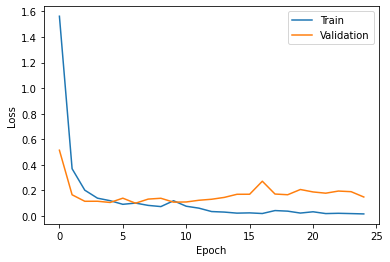

In [50]:
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label = "Validation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

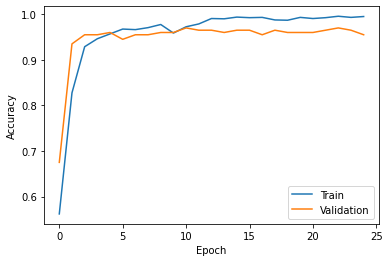

In [51]:
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label = "Validation")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()